# Importing all required Libraries:

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris Dataset:

In [181]:
df = pd.read_csv(r"C:\Users\mouni\Desktop\all_EDA_projects\IRIS.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
141,146,6.7,3.0,5.2,2.3,Iris-virginica
142,147,6.3,2.5,5.0,1.9,Iris-virginica
143,148,6.5,3.0,5.2,2.0,Iris-virginica
144,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis:

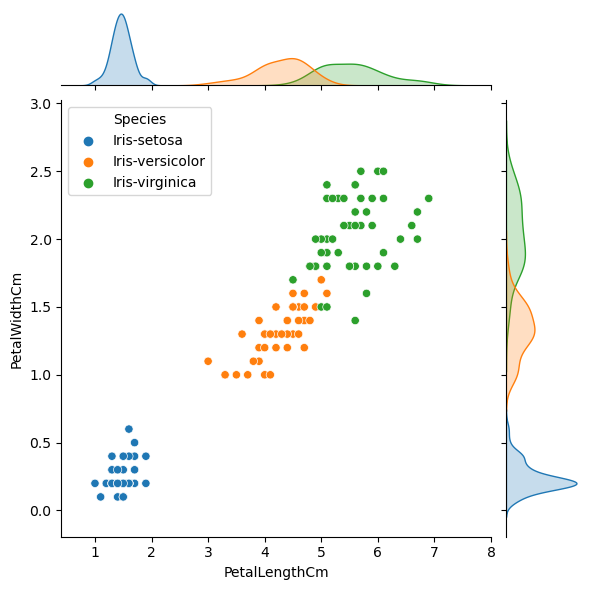

In [182]:
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, hue = 'Species')

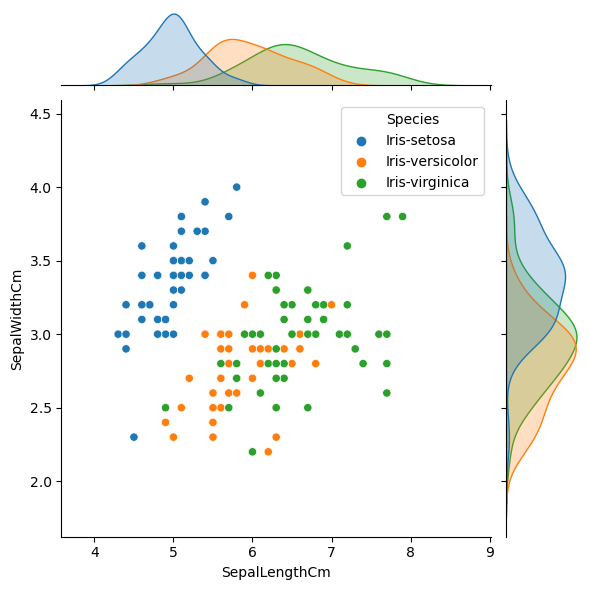

In [183]:
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df, hue = 'Species')

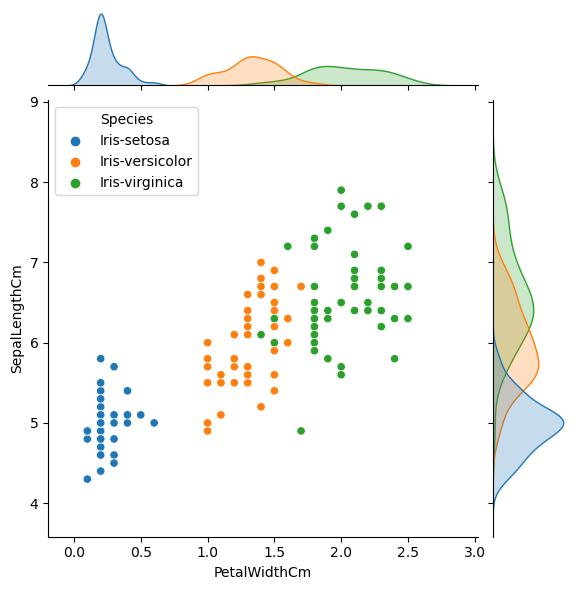

In [184]:
sns.jointplot(x = 'PetalWidthCm', y = 'SepalLengthCm', data = df, hue = 'Species')

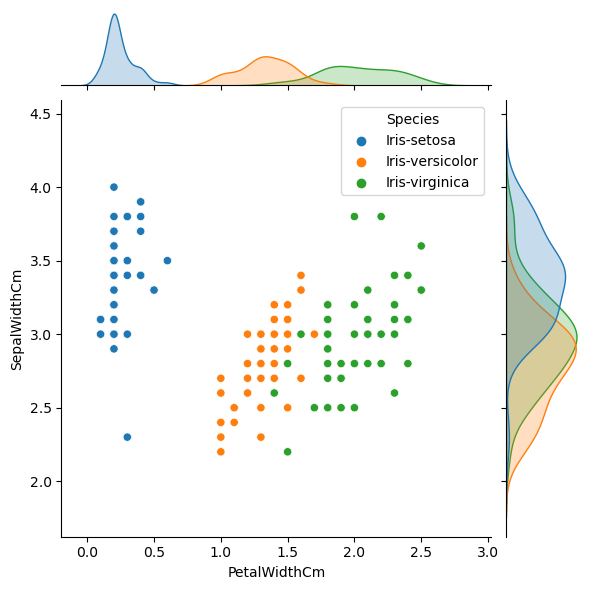

In [185]:
sns.jointplot(x = 'PetalWidthCm', y = 'SepalWidthCm', data = df, hue = 'Species')

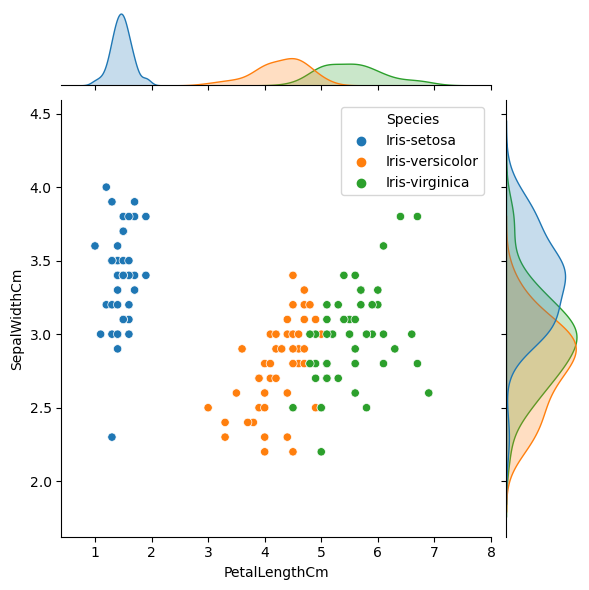

In [186]:
sns.jointplot(x = 'PetalLengthCm', y = 'SepalWidthCm', data = df, hue = 'Species')

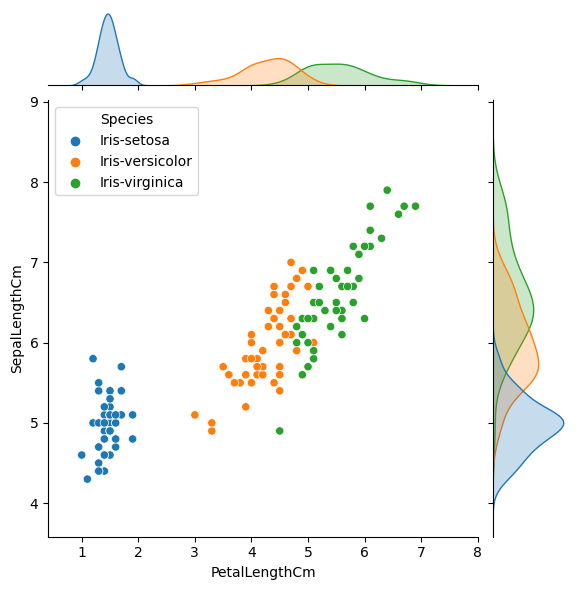

In [187]:
sns.jointplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = df, hue = 'Species')

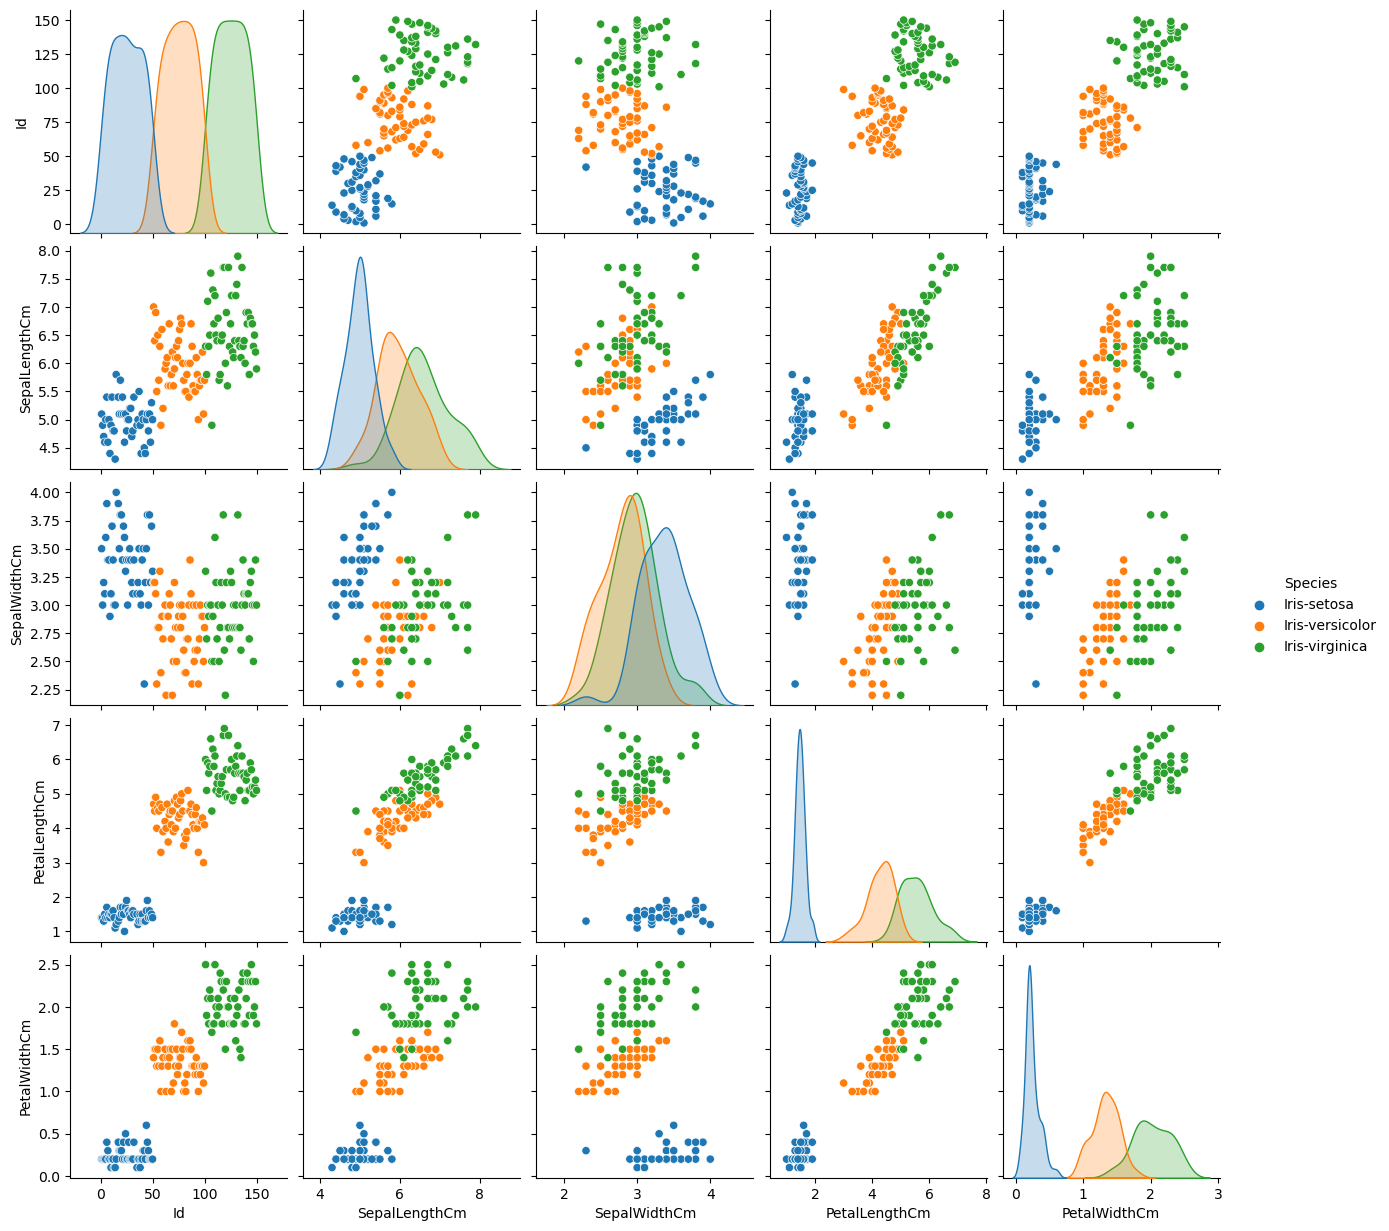

In [188]:
sns.pairplot(df, hue = 'Species')

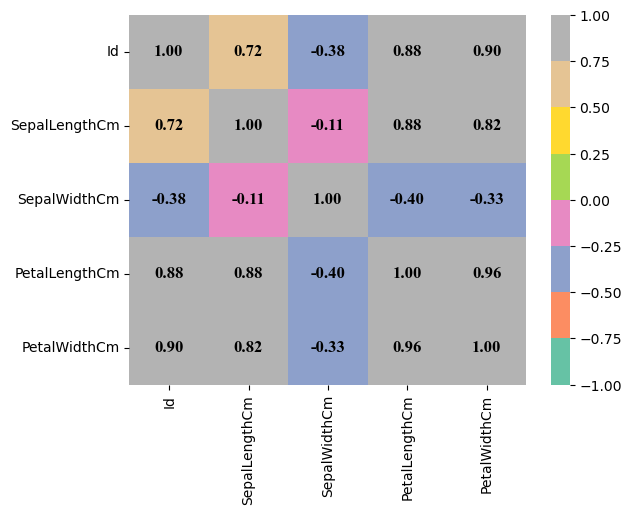

In [189]:
sns.heatmap(df.corr(), cmap = 'Set2',center = 0, vmin = -1, vmax = 1, annot = True,
                                                                    fmt = ".2f", annot_kws = {
                                                                    'fontsize':12,
                                                                    'fontweight':'bold',
                                                                    'fontfamily':'Times new roman',
                                                                    'color':'k'
                                                                     });

# Observations:

- After performing EDA we can say that,
-there is strong relationship between:
    1. PetalLengthCm and SepalLengthCm
    2. PetalLengthCm and PetalWidthCm
    3. PetalWidthCm and SepalengthCm

- Therefore, We can select any one pair from above options as input to build a best model instead of considering entire data as an input to an algorithm.

# Step-1:
   # Identifying inputvariables (X) and Output Variable (or) Target Variable (y)

In [190]:
y = df['Species']
X = df[['PetalWidthCm','SepalLengthCm']]

In [191]:
# Top 10 Records from Target variable.
y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [192]:
# Top 10 records from input variables.
X.head(10)

,PetalWidthCm,SepalLengthCm
0,0.2,5.1
1,0.2,4.9
2,0.2,4.7
3,0.2,4.6
4,0.2,5.0
5,0.4,5.4
6,0.3,4.6
7,0.2,5.0
8,0.2,4.4
9,0.1,4.9


# Step-2:
  # Splitting the data into Train and Test Data


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [195]:
print(X_train.shape, y_train.shape)

(109, 2) (109,)


In [196]:
print(X_test.shape, y_test.shape)

(37, 2) (37,)


# Step-3:
   # Data Preparation of Train Data using Standardization Technique

In [197]:
from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler()

In [198]:
X_Train_Transformed = pd.DataFrame(StandardScaler_object.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

In [199]:
print(X_Train_Transformed.shape)

(109, 2)


In [200]:
X_Train_Transformed.head()

,PetalWidthCm,SepalLengthCm
10,-1.429141,-0.619426
131,1.340803,2.071911
107,0.813195,0.550720
59,0.153684,0.199676
110,1.472705,-0.151368


# Step-4:
  # Building a Logistic Regression Model

In [201]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_object = LogisticRegression()

In [202]:
LogisticRegression_object.fit(X_Train_Transformed, y_train)

LogisticRegression()

# Step-5:
   # Data Preparation of Test Data using Standardization Technique

In [203]:
X_Test_Transformed = pd.DataFrame(StandardScaler_object.transform(X_test), columns = X_test.columns, index = X_test.index)

In [204]:
print(X_Test_Transformed.shape)

(37, 2)


In [205]:
X_Test_Transformed.head()

,PetalWidthCm,SepalLengthCm
7,-1.429141,-1.087485
24,-1.429141,-1.087485
27,-1.429141,-0.853455
119,0.681293,0.433706
142,0.813195,0.433706


# Step-6:
   # Predicions on Test Data

In [206]:
y_Test_Prediction = LogisticRegression_object.predict(X_Test_Transformed)

# Step-7:
   # Evaluation of the Logistic Regression Model

In [207]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_Test_Prediction)

0.9459459459459459

# Step-3:Data Preparation of Train Data using Normalization Technique


In [208]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler_object = MinMaxScaler()

In [209]:
X_train_transformed = pd.DataFrame(MinMaxScaler_object.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

In [210]:
print(X_train_transformed.shape)

(109, 2)


In [211]:
X_train_transformed.head()

,PetalWidthCm,SepalLengthCm
10,0.041667,0.305556
131,0.916667,0.944444
107,0.750000,0.583333
59,0.541667,0.500000
110,0.958333,0.416667


# Step-4:Building a Logistic Regression Model

In [212]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_object = LogisticRegression()

In [213]:
LogisticRegression_object.fit(X_train_transformed, y_train)

LogisticRegression()

# Step-5:Data Preparation of Test Data using Normalization Technique

In [214]:
X_test_transformed = pd.DataFrame(MinMaxScaler_object.transform(X_test), columns = X_test.columns, index = X_test.index)

In [215]:
print(X_test_transformed.shape)

(37, 2)


In [216]:
X_test_transformed.head()

,PetalWidthCm,SepalLengthCm
7,0.041667,0.194444
24,0.041667,0.194444
27,0.041667,0.250000
119,0.708333,0.555556
142,0.750000,0.555556


# Step-6:Predictions on Test Data


In [217]:
y_test_prediction = LogisticRegression_object.predict(X_test_transformed)

# Step-7:Evaluation of Logistic Regression Model

In [218]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_prediction)

0.8918918918918919

# 2. Building a Model using KNN Classifier Algorithm

In [219]:
from sklearn.neighbors import KNeighborsClassifier
KNN_object = KNeighborsClassifier()
KNN_object.fit(X_Train_Transformed, y_train)

KNeighborsClassifier()

# Predictions on Test Data

In [220]:
y_test_predict = KNN_object.predict(X_Test_Transformed)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Evaluation of Test Data

In [221]:
metrics.accuracy_score(y_test, y_test_predict)

0.972972972972973

# 3. Building a Model using Decision Tree Classifier Algorithm

In [222]:
from sklearn.tree import DecisionTreeClassifier
DT_object = DecisionTreeClassifier()
DT_object.fit(X_Train_Transformed, y_train)

DecisionTreeClassifier()

# Predictions on Test Data

In [223]:
y_test_pred = DT_object.predict(X_Test_Transformed)

# Evaluation of Test Data





In [224]:
metrics.accuracy_score(y_test, y_test_pred)

0.918918918918919

# 4. Building a Model Using Random Forest Classifier Algorithm

In [225]:
from sklearn.ensemble import RandomForestClassifier
RF_object = RandomForestClassifier()
RF_object.fit(X_Train_Transformed, y_train)

RandomForestClassifier()

# Predictions on Test Data

In [226]:
y_Test_Prediction = RF_object.predict(X_Test_Transformed)

# Evaluation of Test Data

In [227]:
metrics.accuracy_score(y_test, y_Test_Prediction)

0.972972972972973